In [1]:
import numpy as np
from neurnet import neurnet
from read_iono import iono_data
import matplotlib.pyplot as plt

In [2]:
iono = iono_data()
x_train, y_train = iono.get_train()

In [3]:
num_ins = x_train.shape[0]
num_layers = [10, 5]
num_outs = y_train.shape[0]
afuns = ['relu','relu', 'sigmoid']
lfun = 'BCE'

In [4]:
nnet = neurnet(num_ins, num_layers, num_outs, x_train, afuns, y_train, lfun)
nnet.initnet()

In [5]:
loss = np.full(300, np.nan)
for i in range(300):
    nnet.update_network(0.25)
    l = nnet.net_loss()[-1]
    loss[i] = np.mean(np.abs(l[0,:]))

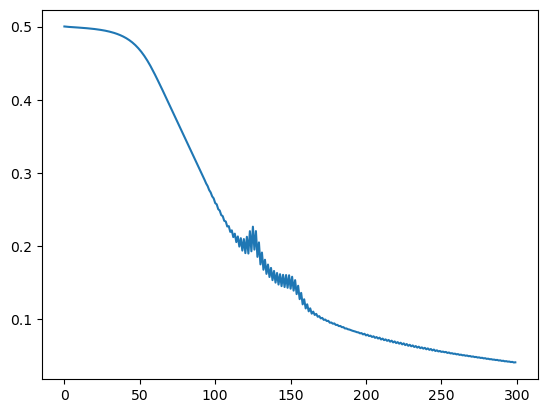

In [6]:
plt.plot(loss)
plt.show()

In [7]:
x_test, y_test = iono.get_test()
nnet.input = x_test
y_p = nnet.ffn()[1][-1]
y_p[y_p<0.5] = 0
y_p[y_p>=0.5] = 1
y_p = y_p.astype(int)

In [8]:
y_test.shape

(1, 200)

In [9]:
inds_fail = np.argwhere(np.abs(y_p[0,:]-y_test[0,:])>0)[:,0]
size_test = y_test.size
size_fail = inds_fail.size
100*(size_test-size_fail)/size_test

94.5